In [3]:
import numpy as np
import pandas as pd
import json
import functools
import matplotlib.pyplot as plt

In [4]:
f6_file="JSON_F6.json"
result_f6=None
with open(f6_file, 'r') as infile:
    result_f6=json.load(infile)

In [5]:
result_f6_dict=dict()
root_res=result_f6["attackTrees"][0]["sim_output"]["root"]
result_f6_dict[root_res["node_ID"]]=root_res["probability_vector"]

subgoal_res=result_f6["attackTrees"][0]["sim_output"]["subgoal_nodes"]
for s_res in subgoal_res:
    result_f6_dict[s_res["node_ID"]]=s_res["probability_vector"]
    
leaves_res=result_f6["attackTrees"][0]["sim_output"]["leaf_nodes"]
for l_res in leaves_res:
    result_f6_dict[l_res["node_ID"]]=l_res["probability_vector"]

print(len(result_f6_dict))

24


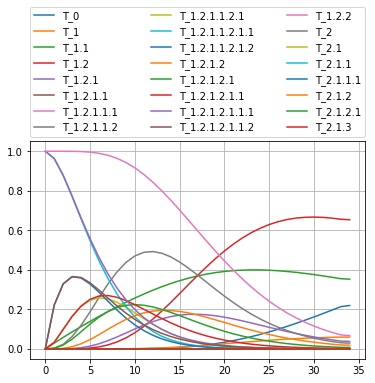

In [6]:
fig = plt.figure(1)
ax = fig.add_subplot(111)
for i in result_f6_dict:
    ax.plot(result_f6_dict[i], label=i)

plt.grid(which='both')
plt.legend()
#plt.minorticks_on()
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(0., 1.02, 1., .102), loc=0, ncol=3, mode="expand", borderaxespad=0.)
fig.savefig("F6_time_series.jpg", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.close()